In [18]:
import re
import matplotlib.pyplot as plt
try:
    import speech_recognition as sr
except ImportError as e:
    !pip install SpeechRecognition
    !pip install PyAudio
    import speech_recognition as sr

In [19]:
class Shape_Process(object):
    
    def __init__(self, query):
        self.query = query.lower()
        self.split_query = self.query.split()
        
    def get_shape(self):
        
        shapes = ['line', 'triangle', 'circle', 'rectangle', 'square', 'pentagon', 'hexagon',  'heptagon', 'octagon', 'nonagon', 'decagon']
        return list(filter(lambda x: x in shapes, self.split_query))[0]
    
    def check_draw_type(self):
        if ('draw' in self.query):
            return 'draw'
        elif ('fill' in self.query):
            return 'fill'
    
    def get_color(self):
        
        colors = ['alice blue', 'antique white', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanched almond', 'blue', 'blue violet', 'brown', 'burly wood', 'cadet blue', 'chartreuse', 'chocolate', 'coral', 'cornflower blue', 'cornsilk', 'crimson', 'cyan', 'dark blue', 'dark cyan', 'dark golden rod', 'dark gray', 'dark grey', 'dark green', 'dark khaki', 'dark magenta', 'dark olive green', 'dark orange', 'dark orchid', 'dark red', 'dark salmon', 'dark sea green', 'dark slate blue', 'dark slate gray', 'dark slate grey', 'dark turquoise', 'dark violet', 'deep pink', 'deep sky blue', 'dim gray', 'dim grey', 'dodger blue', 'fire brick', 'floral white', 'forest green', 'fuchsia', 'gainsboro', 'ghost white', 'gold', 'golden rod', 'gray', 'grey', 'green', 'green yellow', 'honey dew', 'hot pink', 'indian red', 'indigo', 'ivory', 'khaki', 'lavender', 'lavender blush', 'lawn green', 'lemon chiffon', 'light blue', 'light coral', 'light cyan', 'light golden rod yellow', 'light gray', 'light grey', 'light green', 'light pink', 'light salmon', 'light sea green', 'light sky blue', 'light slate gray', 'light slate grey', 'light steel blue', 'light yellow', 'lime', 'lime green', 'linen', 'magenta', 'maroon', 'medium aqua marine', 'medium blue', 'medium orchid', 'medium purple', 'medium sea green', 'medium slate blue', 'medium spring green', 'medium turquoise', 'medium violet red', 'midnight blue', 'mint cream', 'misty rose', 'moccasin', 'navajo white', 'navy', 'old lace', 'olive', 'olive drab', 'orange', 'orange red', 'orchid', 'pale golden rod', 'pale green', 'pale turquoise', 'pale violet red', 'papaya whip', 'peach puff', 'peru', 'pink', 'plum', 'powder blue', 'purple', 'rebecca purple', 'red', 'rosy brown', 'royal blue', 'saddle brown', 'salmon', 'sandy brown', 'sea green', 'sea shell', 'sienna', 'silver', 'sky blue', 'slate blue', 'slate gray', 'slate grey', 'snow', 'spring green', 'steel blue', 'tan', 'teal', 'thistle', 'tomato', 'turquoise', 'violet', 'wheat', 'white', 'white smoke', 'yellow', 'yellow green']
        return [x for x in colors if x in self.query] or ['blue']
    
    def get_coordinates(self):
        pattern = re.compile(r'at.+?(\d+)\D{0,}(\d+)')
        group = pattern.search(self.query)
        x = tuple(map(int, group.groups()))
        return x
    
    def get_size(self):
        
        pattern = re.compile(r'\b[radius|side|length|width|height]+\D*(\d*)\b')
        data = pattern.findall(self.query)
        coordinate = tuple(map(int, data))
        return coordinate
    
    def plot_shape(self):

        shape = self.get_shape()
        color = self.get_color()[0].replace(' ', '')
        coordinate = self.get_coordinates()
        size = self.get_size()
        draw_type = self.check_draw_type()
        
        if(draw_type == 'draw'):
            fill = False
        else:
            fill = True
        
        if (shape == 'circle'):
                plt.xlim(coordinate[0] - size[0] - 10, coordinate[0] + size[0] + 10)
                plt.ylim(coordinate[1] - size[0] - 10, coordinate[1] + size[0] + 10)
                c = plt.Circle((coordinate[0], coordinate[1]), size[0], fill = fill, fc = color)
                plt.gcf().gca().add_patch(c)
        elif (shape == 'square'):
            plt.xlim(coordinate[0] - size[0] - 10, coordinate[0] + size[0] + 10)
            plt.ylim(coordinate[1] - size[0] - 10, coordinate[1] + size[0] + 10)
            square = plt.Rectangle((coordinate[0], coordinate[1]), size[0], size[0], fc = color, fill = fill)
            plt.gcf().gca().add_patch(square)
            
        elif (shape == 'rectangle'):
            plt.xlim(coordinate[0] - size[0] - 10, coordinate[0] + size[0] + 10)
            plt.ylim(coordinate[1] - size[0] - 10, coordinate[1] + size[0] + 10)
            square = plt.Rectangle((coordinate[0], coordinate[1]), size[0], size[1], fc = color, fill = fill)
            plt.gcf().gca().add_patch(square)
            
        elif (shape == 'triangle'):
            plt.xlim(coordinate[0] - size[0] - 10, coordinate[0] + size[0] + 10)
            plt.ylim(coordinate[1] - size[0] - 10, coordinate[1] + size[0] + 10)
            x = coordinate[0]
            y = coordinate[1]
            h = size[0]
            b = size[1]
            triangle = plt.Polygon([(x, y), (x - h, y - b/ 2), (x - h, y + b)], closed = True, fc = color, fill = fill)
            plt.gcf().gca().add_patch(triangle)

In [20]:
s = Shape_Process('fill square with redcolor of radius 10 at position 200, 200')

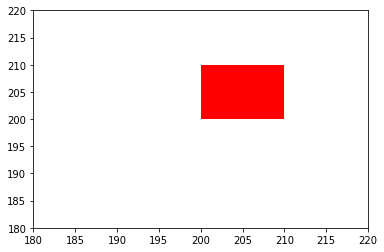

In [21]:
s.plot_shape()

In [22]:
s = Shape_Process('fill rectangle with blue color of lenght is 10 width is 20 at position 200, 200')

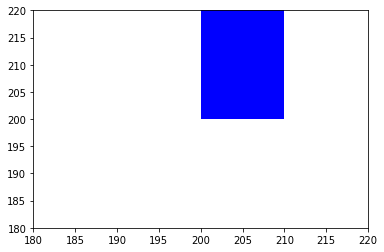

In [23]:
s.plot_shape()

In [24]:
s = Shape_Process('draw triangle of height 10 base of 20 at 10, 10')

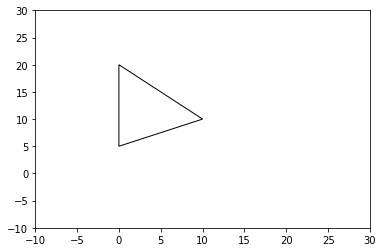

In [25]:
s.plot_shape()

In [52]:
def draw_shape():
    rec = sr.Recognizer()
    with sr.Microphone() as source:
    
        print ('Say Something!')
        audio = rec.listen(source,timeout=2,phrase_time_limit=10)
        print ('Time Over, Thanks')
        text = rec.recognize_google(audio)
        print (text)
        sc = Shape_Process(text)
        sc.plot_shape()

Say Something!
Time Over, Thanks
draw a rectangle of length 20 and where 10 at 20, 10


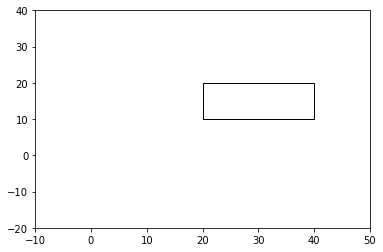

In [56]:
draw_shape()